In [216]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipaddress

from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

## Data loading

In [217]:
num_samples = 10000
outlier_ratio = 0.4

names = ['end_epoch', 'duration', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol', 'flags', 'status', 'service_type', 'packets', 'bytes', 'attack']

background = pd.read_csv("data/training/background_flows_cut.csv", header=None, names=names, nrows=num_samples)
blacklist = pd.read_csv("data/training/blacklist_flows_cut.csv", header=None, names=names, nrows=num_samples * outlier_ratio / 2 - 40)
sshscan = pd.read_csv("data/training/sshscan_flows_cut.csv", header=None, names=names, nrows=num_samples * outlier_ratio / 2)
spam = pd.read_csv("data/training/spam_flows_cut.csv", header=None, names=names)

df = pd.concat([background, blacklist, spam, sshscan], ignore_index=True)

# Convert timestamp to epoch integer
df.end_epoch = pd.to_datetime(df.end_epoch).astype(np.int64)

# Convert attack to boolean
df.attack = df.attack.apply(lambda x: x != 'background')

# Convert IPs to int
df.src_ip = df.src_ip.apply(lambda x: np.int64(ipaddress.IPv4Address(x)))
df.dst_ip = df.src_ip.apply(lambda x: np.int64(ipaddress.IPv4Address(x)))

df.head()

,end_epoch,duration,src_ip,dst_ip,src_port,dst_port,protocol,flags,status,service_type,packets,bytes,attack
0,1460937720000000000,55.952,719034749,719034749,32004,55116,TCP,.A....,0,0,29544,1197024,False
1,1460937721000000000,13.148,2403862665,2403862665,53,56415,UDP,.A....,0,0,2,250,False
2,1460937721000000000,13.160,2403862665,2403862665,53,42993,UDP,.A....,0,0,2,256,False
3,1460937722000000000,12.704,2403862665,2403862665,53,49453,UDP,.A....,0,0,2,256,False
4,1460937722000000000,13.196,2403862665,2403862665,53,49998,UDP,.A....,0,0,2,256,False


In [218]:
num_samples_attacks = int(num_samples * outlier_ratio / 6)
background = pd.read_csv("data/test/background_flows_cut.csv", header=None, names=names, nrows=num_samples)
blacklist = pd.read_csv("data/test/blacklist_flows_cut.csv", header=None, names=names, nrows=num_samples_attacks)
botnet = pd.read_csv("data/test/botnet_flows_cut.csv", header=None, names=names, nrows=num_samples_attacks)
dos = pd.read_csv("data/test/dos_flows_cut.csv", header=None, names=names, nrows=num_samples_attacks)
scan11 = pd.read_csv("data/test/scan11_flows_cut.csv", header=None, names=names, nrows=num_samples_attacks)
scan44 = pd.read_csv("data/test/scan44_flows_cut.csv", header=None, names=names, nrows=num_samples_attacks)
spam = pd.read_csv("data/test/spam_flows_cut.csv", header=None, names=names, nrows=num_samples_attacks)
sshscan = pd.read_csv("data/test/sshscan_flows_cut.csv", header=None, names=names)

df_test = pd.concat([background, blacklist, botnet, dos, scan11, scan44, spam, sshscan], ignore_index=True)

# Convert timestamp to epoch integer
df_test.end_epoch = pd.to_datetime(df_test.end_epoch).astype(np.int64)

# Convert attack to boolean
df_test.attack = df_test.attack.apply(lambda x: x != 'background')

# Convert IPs to int
df_test.src_ip = df_test.src_ip.apply(lambda x: np.int64(ipaddress.IPv4Address(x)))
df_test.dst_ip = df_test.src_ip.apply(lambda x: np.int64(ipaddress.IPv4Address(x)))

df_test

,end_epoch,duration,src_ip,dst_ip,src_port,dst_port,protocol,flags,status,service_type,packets,bytes,attack
0,1470614993000000000,45.780,719036252,719036252,0,769,ICMP,.A....,0,192,11,880,False
1,1470614996000000000,44.256,719034872,719034872,80,26289,TCP,.A..S.,0,0,3,164,False
2,1470614998000000000,50.608,719034727,719034727,0,771,ICMP,.A....,0,200,8,832,False
3,1470615000000000000,51.968,719036246,719036246,0,769,ICMP,.A....,0,192,31,2480,False
4,1470615001000000000,0.000,1788278962,1788278962,40022,15621,UDP,.A....,0,0,1,48,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,1470962639000000000,0.000,549291160,549291160,22,41717,TCP,...R..,0,40,1,40,True
13997,1470967497000000000,0.000,719035623,719035623,33171,22,TCP,...R..,0,0,1,40,True
13998,1470967498000000000,0.000,3755633326,3755633326,22,33171,TCP,.A....,0,0,1,40,True
13999,1471097408000000000,0.000,3073309192,3073309192,22,30173,TCP,.A.R..,0,0,1,40,True


In [219]:
print(f'Size of the dataset: {len(df)}\n')
print(f'Sumber of Nan values: {df.isnull().values.sum()}\n')
print(f'Column number: {len(df.columns)}\n')
print(f'Column names:\n{list(df.columns)}\n')
print('Column types:')
df.dtypes

Size of the dataset: 14001

Sumber of Nan values: 0

Column number: 13

Column names:
['end_epoch', 'duration', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol', 'flags', 'status', 'service_type', 'packets', 'bytes', 'attack']

Column types:


end_epoch         int64
duration        float64
src_ip            int64
dst_ip            int64
src_port          int64
dst_port          int64
protocol         object
flags            object
status            int64
service_type      int64
packets           int64
bytes             int64
attack             bool
dtype: object

#### Control of flows

In [220]:
print(f"Number of background exchanges : {len(df[df.attack == False])}")
print(f"Number of attack: {len(df[df.attack])}")
print(f"Number of blacklisted IP attack: {len(blacklist)}")
print(f"Number of ssh scan attack: {len(sshscan)}")
print(f"Number of spam attack: {len(spam)}")

Number of background exchanges : 10000
Number of attack: 4001
Number of blacklisted IP attack: 666
Number of ssh scan attack: 5
Number of spam attack: 666


#### Numeric columns

In [221]:
numeric_df = df._get_numeric_data()
numeric_df.describe()

,end_epoch,duration,src_ip,dst_ip,src_port,dst_port,status,service_type,packets,bytes
count,1.400100e+04,14001.000000,1.400100e+04,1.400100e+04,14001.000000,14001.000000,14001.0,14001.000000,14001.000000,1.400100e+04
mean,1.460939e+18,1.887841,1.559093e+09,1.559093e+09,23158.166202,21919.739019,0.0,6.868867,14.949789,7.601134e+03
std,1.171379e+13,5.239898,1.085733e+09,1.085733e+09,24416.405318,24220.935655,0.0,18.425276,300.699236,1.935367e+05
min,1.460938e+18,0.000000,5.413058e+08,5.413058e+08,0.000000,0.000000,0.0,0.000000,1.000000,3.100000e+01
25%,1.460938e+18,0.000000,7.190356e+08,7.190356e+08,53.000000,53.000000,0.0,0.000000,1.000000,8.300000e+01
50%,1.460938e+18,0.092000,1.010349e+09,1.010349e+09,8080.000000,445.000000,0.0,0.000000,3.000000,3.000000e+02
75%,1.460938e+18,1.556000,2.403863e+09,2.403863e+09,48997.000000,47364.000000,0.0,0.000000,11.000000,1.320000e+03
max,1.461503e+18,194.796000,4.294738e+09,4.294738e+09,65521.000000,65521.000000,0.0,200.000000,29544.000000,1.765682e+07


## Dataset Visualisation

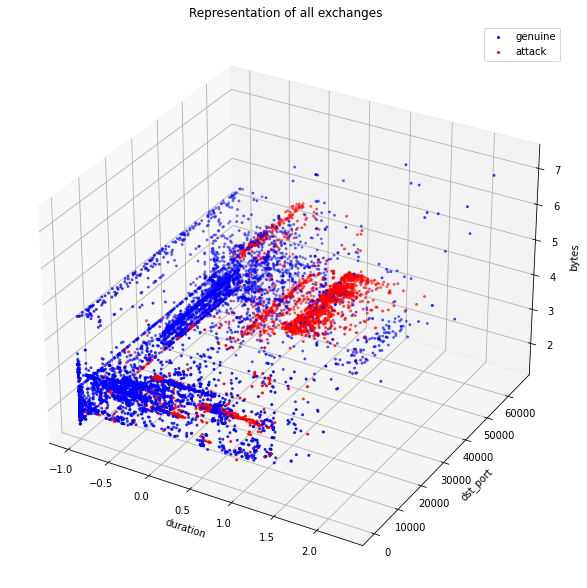

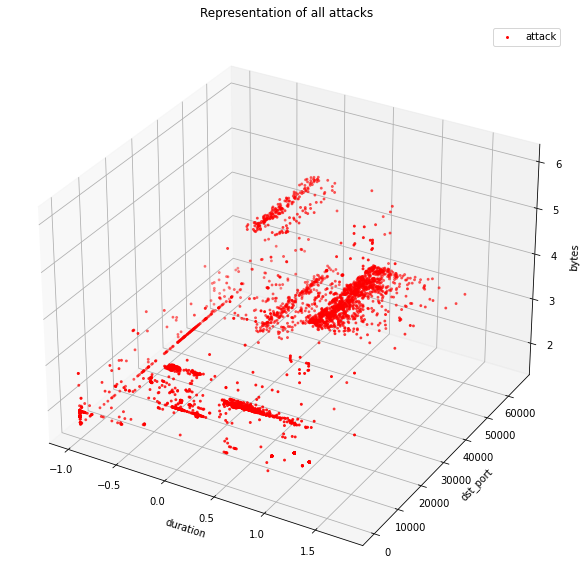

In [222]:
def show3D_flow_exchanges(df, x_axis, y_axis, z_axis, title):
    fig = plt.figure(figsize=(10,12))
    ax = fig.add_subplot(111, projection='3d')

    for attack in df.attack.unique():
        df_label = df[df.attack == attack]
        x = df_label[x_axis]
        y = df_label[y_axis]
        z = df_label[z_axis]
        ax.scatter(np.log10(x + 0.1), y, np.log10(z), color= 'red' if attack else 'blue' , label='attack' if attack else 'genuine', marker='.', s=15)

    ax.set_xlabel(x_axis)
    ax.set_ylabel(y_axis)
    ax.set_zlabel(z_axis)
    ax.set_title(title)

    plt.legend()

show3D_flow_exchanges(df, 'duration', 'dst_port', 'bytes', 'Representation of all exchanges')
show3D_flow_exchanges(df[df.attack], 'duration', 'dst_port', 'bytes', 'Representation of all attacks')

## Data Cleaning

In [223]:
one_hot_encoded_df = pd.get_dummies(df)
display(one_hot_encoded_df.head())
print(one_hot_encoded_df.isna().sum().any())

one_hot_encoded_df_test = pd.get_dummies(df_test)
one_hot_encoded_df_test['protocol_ESP'] = 0
one_hot_encoded_df_test['protocol_GRE'] = 0
one_hot_encoded_df_test['protocol_IPv6'] = 0

,end_epoch,duration,src_ip,dst_ip,src_port,dst_port,status,service_type,packets,bytes,...,flags_.A.RS.,flags_.A.RSF,flags_.AP...,flags_.AP..F,flags_.AP.S.,flags_.AP.SF,flags_.APR..,flags_.APR.F,flags_.APRS.,flags_.APRSF
0,1460937720000000000,55.952,719034749,719034749,32004,55116,0,0,29544,1197024,...,0,0,0,0,0,0,0,0,0,0
1,1460937721000000000,13.148,2403862665,2403862665,53,56415,0,0,2,250,...,0,0,0,0,0,0,0,0,0,0
2,1460937721000000000,13.160,2403862665,2403862665,53,42993,0,0,2,256,...,0,0,0,0,0,0,0,0,0,0
3,1460937722000000000,12.704,2403862665,2403862665,53,49453,0,0,2,256,...,0,0,0,0,0,0,0,0,0,0
4,1460937722000000000,13.196,2403862665,2403862665,53,49998,0,0,2,256,...,0,0,0,0,0,0,0,0,0,0


False


## Outlier detection

#### Isolation Forests

In [224]:
classifier = IsolationForest(contamination=outlier_ratio, n_estimators=2).fit(one_hot_encoded_df.values)
y_pred = classifier.predict(one_hot_encoded_df_test.values)

df_outliers = one_hot_encoded_df.copy()
df_outliers['if_outliers'] = [i == -1 for i in  y_pred]
df_outliers

,end_epoch,duration,src_ip,dst_ip,src_port,dst_port,status,service_type,packets,bytes,...,flags_.A.RSF,flags_.AP...,flags_.AP..F,flags_.AP.S.,flags_.AP.SF,flags_.APR..,flags_.APR.F,flags_.APRS.,flags_.APRSF,if_outliers
0,1460937720000000000,55.952,719034749,719034749,32004,55116,0,0,29544,1197024,...,0,0,0,0,0,0,0,0,0,True
1,1460937721000000000,13.148,2403862665,2403862665,53,56415,0,0,2,250,...,0,0,0,0,0,0,0,0,0,True
2,1460937721000000000,13.160,2403862665,2403862665,53,42993,0,0,2,256,...,0,0,0,0,0,0,0,0,0,True
3,1460937722000000000,12.704,2403862665,2403862665,53,49453,0,0,2,256,...,0,0,0,0,0,0,0,0,0,True
4,1460937722000000000,13.196,2403862665,2403862665,53,49998,0,0,2,256,...,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,1460937764000000000,4.900,1192241069,1192241069,22,55892,0,8,12,1846,...,0,0,0,0,1,0,0,0,0,True
13997,1460937764000000000,4.324,1192241114,1192241114,22,37854,0,8,12,1838,...,0,0,0,0,1,0,0,0,0,True
13998,1460937751000000000,9.256,1192241097,1192241097,22,41192,0,8,12,1440,...,0,0,0,1,0,0,0,0,0,True
13999,1460937764000000000,4.156,1192240917,1192240917,22,33211,0,8,13,1890,...,0,0,0,0,1,0,0,0,0,True


In [225]:
fraudulent_outliers = df_outliers[(df_outliers.attack) & (df_outliers.if_outliers)]
print(f'{len(fraudulent_outliers)} attacks are labelled as outlier.')

fraudulent_inliers = df_outliers[(df_outliers.attack) & (df_outliers.if_outliers == False)]
print(f'{len(fraudulent_inliers)} attacks are not labelled as outlier.')

not_fraudulent_outliers = df_outliers[(df_outliers.attack == False) & (df_outliers.if_outliers)]
print(f'{len(not_fraudulent_outliers)} genuine exchanges are labelled as outlier.')

not_fraudulent_inliers = df_outliers[(df_outliers.attack == False) & (df_outliers.if_outliers == False)]
print(f'{len(not_fraudulent_inliers)} genuine exchanges are not labelled as outlier.')

4001 attacks are labelled as outlier.
0 attacks are not labelled as outlier.
10000 genuine exchanges are labelled as outlier.
0 genuine exchanges are not labelled as outlier.


#### Local Outlier Factor

In [226]:
localOutlierFactor = LocalOutlierFactor(contamination=outlier_ratio, n_neighbors=len(df) - 1).fit(one_hot_encoded_df.values)

lof_outliers = localOutlierFactor.fit_predict(one_hot_encoded_df_test.values)

df_outliers['lof_outliers'] = [i == -1 for i in  lof_outliers]
df_outliers

,end_epoch,duration,src_ip,dst_ip,src_port,dst_port,status,service_type,packets,bytes,...,flags_.AP...,flags_.AP..F,flags_.AP.S.,flags_.AP.SF,flags_.APR..,flags_.APR.F,flags_.APRS.,flags_.APRSF,if_outliers,lof_outliers
0,1460937720000000000,55.952,719034749,719034749,32004,55116,0,0,29544,1197024,...,0,0,0,0,0,0,0,0,True,False
1,1460937721000000000,13.148,2403862665,2403862665,53,56415,0,0,2,250,...,0,0,0,0,0,0,0,0,True,False
2,1460937721000000000,13.160,2403862665,2403862665,53,42993,0,0,2,256,...,0,0,0,0,0,0,0,0,True,False
3,1460937722000000000,12.704,2403862665,2403862665,53,49453,0,0,2,256,...,0,0,0,0,0,0,0,0,True,False
4,1460937722000000000,13.196,2403862665,2403862665,53,49998,0,0,2,256,...,0,0,0,0,0,0,0,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,1460937764000000000,4.900,1192241069,1192241069,22,55892,0,8,12,1846,...,0,0,0,1,0,0,0,0,True,True
13997,1460937764000000000,4.324,1192241114,1192241114,22,37854,0,8,12,1838,...,0,0,0,1,0,0,0,0,True,True
13998,1460937751000000000,9.256,1192241097,1192241097,22,41192,0,8,12,1440,...,0,0,1,0,0,0,0,0,True,True
13999,1460937764000000000,4.156,1192240917,1192240917,22,33211,0,8,13,1890,...,0,0,0,1,0,0,0,0,True,True


In [227]:

fraudulent_outliers = df_outliers[(df_outliers.attack) & (df_outliers.lof_outliers)]
print(f'{len(fraudulent_outliers)} attacks are labelled as outlier.')

fraudulent_inliers = df_outliers[(df_outliers.attack) & (df_outliers.lof_outliers == False)]
print(f'{len(fraudulent_inliers)} attacks are not labelled as outlier.')

not_fraudulent_outliers = df_outliers[(df_outliers.attack == False) & (df_outliers.lof_outliers)]
print(f'{len(not_fraudulent_outliers)} genuine exchanges are labelled as outlier.')

not_fraudulent_inliers = df_outliers[(df_outliers.attack == False) & (df_outliers.lof_outliers == False)]
print(f'{len(not_fraudulent_inliers)} genuine exchanges are not labelled as outlier.')

4000 attacks are labelled as outlier.
1 attacks are not labelled as outlier.
1010 genuine exchanges are labelled as outlier.
8990 genuine exchanges are not labelled as outlier.


In [237]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

labels = one_hot_encoded_df['attack']
labels_test = one_hot_encoded_df_test['attack']

classifier = RandomForestClassifier()
classifier.fit(one_hot_encoded_df, labels)
classifier.score(one_hot_encoded_df_test, labels_test)

/home/leiyks/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


1.0